In [1]:
import pandas as pd
df = pd.read_csv('input.csv')
df

,bus_id,time,nextstationtimining,flow,kopargaon,pune,shirdi
0,4,09:10:22,09:48:32,0,0,0,0
1,1,09:50:00,10:45:33,0,1,0,0
2,1,17:47:14,18:28:48,1,1,0,0
3,3,12:34:23,13:05:23,1,0,0,1
4,3,10:47:22,15:17:21,0,0,0,1
5,1,01:30:35,02:22:15,0,1,0,0
6,4,02:15:24,02:52:57,0,0,0,0
7,3,01:32:14,02:07:35,1,0,0,1
8,3,00:23:44,05:50:24,0,0,0,1


In [2]:
dum = pd.get_dummies(df['bus_id'])
dum

,1,3,4
0,False,False,True
1,True,False,False
2,True,False,False
3,False,True,False
4,False,True,False
5,True,False,False
6,False,False,True
7,False,True,False
8,False,True,False


In [3]:
df = pd.concat([df,dum],axis='columns')
df

,bus_id,time,nextstationtimining,flow,kopargaon,pune,shirdi,1,3,4
0,4,09:10:22,09:48:32,0,0,0,0,False,False,True
1,1,09:50:00,10:45:33,0,1,0,0,True,False,False
2,1,17:47:14,18:28:48,1,1,0,0,True,False,False
3,3,12:34:23,13:05:23,1,0,0,1,False,True,False
4,3,10:47:22,15:17:21,0,0,0,1,False,True,False
5,1,01:30:35,02:22:15,0,1,0,0,True,False,False
6,4,02:15:24,02:52:57,0,0,0,0,False,False,True
7,3,01:32:14,02:07:35,1,0,0,1,False,True,False
8,3,00:23:44,05:50:24,0,0,0,1,False,True,False


In [4]:
X = df.drop(['bus_id','yeola'],axis='columns')
X

KeyError: "['yeola'] not found in axis"

In [ ]:
def convert_time_to_seconds(time_str):
  """
  Converts a string of the format "hrs-min-sec" into seconds as an integer.

  Args:
    time_str: A string of the format "hrs-min-sec".

  Returns:
    An integer representing the time in seconds.
  """

  hours, minutes, seconds = time_str.split(':')
  if hours=='':
    hours =0
  if minutes=='':
    minutes =0
  if seconds=='':
    seconds=0
  hours = int(hours)
  minutes = int(minutes)
  seconds = int(seconds)
  return hours * 3600 + minutes * 60 + seconds

# Example usage
time_str = "2:30:45"
seconds = convert_time_to_seconds(time_str)
print(f"{time_str} in seconds is {seconds}")

2:30:45 in seconds is 9045


In [ ]:
X['time'] = X['time'].apply(convert_time_to_seconds)
X['nextstationtimining'] = X['nextstationtimining'].apply(convert_time_to_seconds)
X

,time,nextstationtimining,flow,kopargaon,pune,shirdi
0,33022,35312,1,False,False,False
1,35400,38733,1,True,False,False
2,64034,66528,0,True,False,False
3,45263,47123,0,False,False,True
4,25692,45262,0,False,True,False
5,38842,55042,1,False,False,True


In [ ]:
y = X['nextstationtimining']
y
X = X.drop(['nextstationtimining'],axis='columns')


In [ ]:
X

,time,flow,kopargaon,pune,shirdi
0,33022,1,False,False,False
1,35400,1,True,False,False
2,64034,0,True,False,False
3,45263,0,False,False,True
4,25692,0,False,True,False
5,38842,1,False,False,True


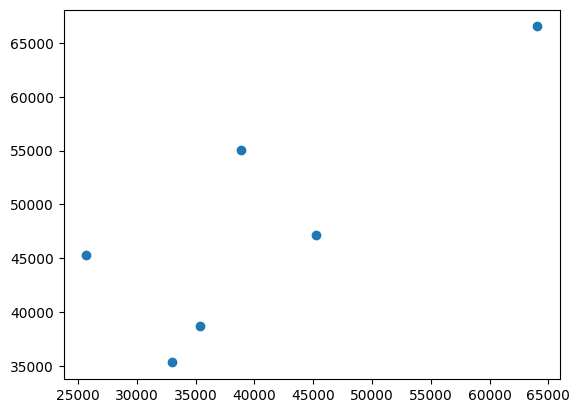

In [ ]:
from matplotlib import pyplot as plt
# plt.plot(X['time'],y)
plt.scatter(df['time'].apply(convert_time_to_seconds),df['nextstationtimining'].apply(convert_time_to_seconds))

In [ ]:
y

0    35312
1    38733
2    66528
3    47123
4    45262
5    55042
Name: nextstationtimining, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

1.0

In [ ]:
model.predict([[47123,1,False,False,True]])

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68356.1689101])

In [ ]:
import pickle
with open('bus_predictin_model','wb') as f:
    pickle.dump(model,f)